In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
teams_df = pd.read_csv("Teams.csv")
playoffs_df = pd.read_csv("PlayoffTeams.csv")
salaries_df = pd.read_csv("Salaries.csv")
franchises_df = pd.read_csv("TeamsFranchises.csv")
teams_df.head()
teams_df.count

<bound method DataFrame.count of       yearID lgID teamID franchID divID  Rank    G  Ghome   W   L  ...     DP  \
0       1871  NaN    BS1      BNA   NaN     3   31    NaN  20  10  ...    NaN   
1       1871  NaN    CH1      CNA   NaN     2   28    NaN  19   9  ...    NaN   
2       1871  NaN    CL1      CFC   NaN     8   29    NaN  10  19  ...    NaN   
3       1871  NaN    FW1      KEK   NaN     7   19    NaN   7  12  ...    NaN   
4       1871  NaN    NY2      NNA   NaN     5   33    NaN  16  17  ...    NaN   
...      ...  ...    ...      ...   ...   ...  ...    ...  ..  ..  ...    ...   
2800    2015   NL    LAN      LAD     W     1  162   81.0  92  70  ...  133.0   
2801    2015   NL    SFN      SFG     W     2  162   81.0  84  78  ...  145.0   
2802    2015   NL    ARI      ARI     W     3  162   81.0  79  83  ...  146.0   
2803    2015   NL    SDN      SDP     W     4  162   81.0  74  88  ...  138.0   
2804    2015   NL    COL      COL     W     5  162   81.0  68  94  ...  171.

In [3]:
# clean up Teams dataframes to chosen years (2005-2015)

teams_df = teams_df.loc[teams_df['yearID'] > 2004]
teams_df.count
playoffs_df = playoffs_df.loc[playoffs_df['yearID'] > 2004]
playoffs_df.count

<bound method DataFrame.count of      yearID  round teamIDwinner lgIDwinner teamIDloser lgIDloser  wins  \
222    2005   ALCS          CHA         AL         LAA        AL     4   
223    2005  ALDS1          CHA         AL         BOS        AL     3   
224    2005  ALDS2          LAA         AL         NYA        AL     3   
225    2005   NLCS          HOU         NL         SLN        NL     4   
226    2005  NLDS1          SLN         NL         SDN        NL     3   
..      ...    ...          ...        ...         ...       ...   ...   
302    2015   NLWC          CHN         NL         PIT        NL     1   
303    2015   NLCS          NYN         NL         CHN        NL     4   
304    2015  NLDS1          CHN         NL         SLN        NL     3   
305    2015  NLDS2          NYN         NL         LAN        NL     3   
306    2015     WS          KCA         AL         NYN        NL     4   

     losses  ties  
222       1     0  
223       0     0  
224       2     0 

In [4]:
# plot_df = cleaned_df[['Drug Regimen', 'Mouse ID']].drop_duplicates().groupby('Drug Regimen').count()

winners_df = playoffs_df[['teamIDwinner']].drop_duplicates()
winners_df.head()
winners_df.count()
#losers_df
losers_df = playoffs_df[['teamIDloser']].drop_duplicates()
losers_df.head()
losers_df.count()

print(winners_df)
print(losers_df)

    teamIDwinner
222          CHA
224          LAA
225          HOU
226          SLN
229          DET
231          OAK
233          NYN
236          BOS
238          CLE
239          COL
240          ARI
243          TBA
246          PHI
247          LAN
250          NYA
257          TEX
260          SFN
269          MIL
271          BAL
284          PIT
289          KCA
301          TOR
302          CHN
    teamIDloser
222         LAA
223         BOS
224         NYA
225         SLN
226         SDN
227         ATL
228         HOU
229         OAK
231         MIN
232         NYN
233         LAN
235         DET
236         CLE
239         ARI
240         CHN
241         PHI
242         COL
245         CHA
248         MIL
249         TBA
261         CIN
263         TEX
273         BAL
277         WAS
286         PIT
297         KCA
299         TOR


28

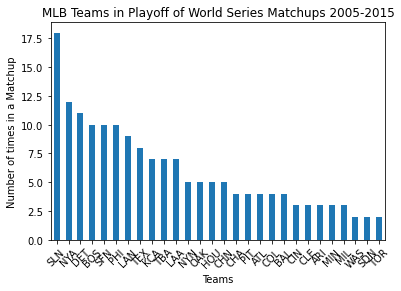

In [5]:
playoff_count_df = playoffs_df['teamIDwinner'].append(playoffs_df['teamIDloser'])

playoff_count_df = playoff_count_df.value_counts()

playoff_chart = playoff_count_df.plot.bar(rot=45)
plt.title("MLB Teams in Playoff of World Series Matchups 2005-2015")
plt.xlabel("Teams")
plt.ylabel("Number of times in a Matchup")
playoff_chart
playoff_count_df.count()


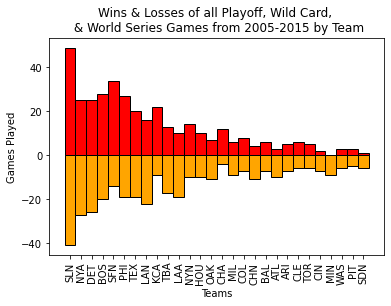

,W-Win,W-Loss,L-Win,L-Loss,Total Wins,Total Losses,Total Games
Teams,,,,,,,
SLN,39.0,19.0,10.0,22.0,49.0,41.0,90.0
NYA,17.0,6.0,8.0,21.0,25.0,27.0,52.0
DET,20.0,7.0,5.0,19.0,25.0,26.0,51.0
BOS,25.0,10.0,3.0,10.0,28.0,20.0,48.0
SFN,34.0,14.0,0.0,0.0,34.0,14.0,48.0
PHI,21.0,5.0,6.0,14.0,27.0,19.0,46.0
TEX,14.0,7.0,6.0,12.0,20.0,19.0,39.0
LAN,9.0,1.0,7.0,21.0,16.0,22.0,38.0
KCA,19.0,5.0,3.0,4.0,22.0,9.0,31.0


In [6]:
# stacked bar graph for wins and loses per match up AND ratio of wins to total games played per year per team

wins_losses_df = playoffs_df.copy()

# Seperating out data by team for wins and losses

wins = wins_losses_df[["teamIDwinner", "wins",
                       "losses"]].rename(columns={"teamIDwinner":"Teams", "wins": "W-Win", "losses":"W-Loss"})

losses = wins_losses_df[["teamIDloser", "losses",
                         "wins"]].rename(columns={"teamIDloser":"Teams", "losses":"L-Win", "wins":"L-Loss"})

win_data = wins.groupby(["Teams"]).sum()

loss_data = losses.groupby(["Teams"]).sum()

games_df = pd.merge(win_data, loss_data, on="Teams", how="outer")

games_df = games_df.fillna(0)

games_df["Total Wins"] = games_df["W-Win"] + games_df["L-Win"]

games_df["Total Losses"] = games_df["W-Loss"] + games_df["L-Loss"]

games_df["Total Games"] = games_df["Total Wins"] + games_df["Total Losses"]

games_df.sort_values(by=["Total Games"], inplace=True, ascending=False)

# Bar chart

win_bar = games_df["Total Wins"]
# loss_bar = games_df["Total Losses"]
loss_bar = games_df["Total Losses"]*(-1)

bars = np.add(win_bar, loss_bar).tolist()

r = np.arange(0,56,2)

names = games_df.index.values
width = 2

# plt.bar(r, win_bar, bottom=loss_bar, color='red', edgecolor='black', width=barWidth)
plt.bar(r, win_bar, color='red', edgecolor='black', width=width)
plt.bar(r, loss_bar, color='orange', edgecolor='black', width=width)

plt.xticks(r, names, rotation=90)
plt.xlabel("Teams")
plt.ylabel("Games Played")
plt.title("Wins & Losses of all Playoff, Wild Card, \n & World Series Games from 2005-2015 by Team")
plt.show()

# This is just a check. It provides the totals of all games per team. Since every match has a winner and a loser,
# the "Total Games" will be double the number of matches in the playoffs and WS between 2005-2015.
# games_df.sum()

games_df

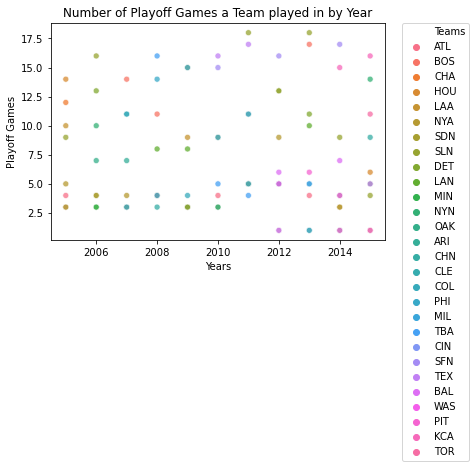

,yearID,Teams,Wins,Losses,Total Games,Win Ratio
0,2005,ATL,1,3,4,25.000000
1,2005,BOS,0,3,3,0.000000
2,2005,CHA,11,1,12,91.666667
3,2005,HOU,7,7,14,50.000000
4,2005,LAA,4,6,10,40.000000
...,...,...,...,...,...,...
91,2015,NYN,8,6,14,57.142857
92,2015,PIT,0,1,1,0.000000
93,2015,SLN,1,3,4,25.000000
94,2015,TEX,2,3,5,40.000000


In [23]:
# ratio of wins to total games played per year per team

wins_year = wins_losses_df[["teamIDwinner", "wins", "losses", 
                       "yearID"]].rename(columns={"teamIDwinner":"Teams", "wins": "Wins", "losses":"Losses"})

wins_year = wins_year.groupby(["Teams", "yearID"]).sum()

wins_year = wins_year.reset_index()

losses_year = wins_losses_df[["teamIDloser", "losses",
                              "wins", "yearID"]].rename(columns={"teamIDloser":"Teams", "losses":"Wins", "wins":"Losses"})

losses_year = losses_year.groupby(["Teams", "yearID"]).sum()

losses_year = losses_year.reset_index()

ratio_df = wins_year.append(losses_year)

ratio_df = ratio_df.groupby(["yearID", "Teams"]).sum()

ratio_df["Total Games"] = ratio_df["Wins"] + ratio_df["Losses"]

ratio_df["Win Ratio"] = (ratio_df["Wins"]/ratio_df["Total Games"])*100

ratio_df = ratio_df.reset_index()

unique_teams = ratio_df[["Teams"]].drop_duplicates()

unique_teams["Color"] = unique_teams.index

# for row in ratio_df if:
    

sns.scatterplot(x=ratio_df["yearID"], y=ratio_df["Total Games"], alpha=0.75, hue=ratio_df["Teams"])
plt.xlabel("Years")
plt.ylabel("Playoff Games")
plt.title("Number of Playoff Games a Team played in by Year")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
ratio_df

In [8]:
# loser_teams = playoffs_df['teamIDloser'].value_counts()

# playoffs_loses = loser_teams.plot.bar(rot=45)
# plt.title("MLB Losers in Playoffs 2005-2015")
# plt.xlabel("Teams")
# plt.ylabel("Number of times in Playoffs")
# playoffs_loses